In [88]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import f_oneway
import seaborn as sns
matplotlib.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 11,10


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [2]:
df = pd.read_csv('pokemon.csv', error_bad_lines=False) 
df.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


# Вопросы

<div class="alert alert-info">
<b>Вопрос № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [5]:
# оставим только требуемые нам метрики
attack = df.loc[:, ['Class 1','Class 2','Attack']]
attack

,Class 1,Class 2,Attack
0,Grass,Poison,49
1,Grass,Poison,62
2,Grass,Poison,82
3,Grass,Poison,100
4,Fire,NaN,52
...,...,...,...
795,Rock,Fairy,100
796,Rock,Fairy,160
797,Psychic,Ghost,110
798,Psychic,Dark,160


In [6]:
# проверим, есть ли покемоны, относящиеся к обоим классам
drop = attack[((attack['Class 1'] == 'Grass') & (attack['Class 2'] == 'Rock')) | ((attack['Class 1'] == 'Rock') & (attack['Class 2'] == 'Grass'))]
drop.head()

,Class 1,Class 2,Attack
377,Rock,Grass,41
378,Rock,Grass,81


In [7]:
# удалим покемонов, относящихся к ондому классу
attack.drop([377,378], axis = 0, inplace = True)

In [8]:
attack

,Class 1,Class 2,Attack
0,Grass,Poison,49
1,Grass,Poison,62
2,Grass,Poison,82
3,Grass,Poison,100
4,Fire,NaN,52
...,...,...,...
795,Rock,Fairy,100
796,Rock,Fairy,160
797,Psychic,Ghost,110
798,Psychic,Dark,160


In [9]:
# оставим только требуемые нам классы
attack = attack[((attack['Class 1'] == 'Grass') | (attack['Class 1'] == 'Rock')) | ((attack['Class 2'] == 'Grass') | (attack['Class 2'] == 'Rock'))]
attack

,Class 1,Class 2,Attack
0,Grass,Poison,49
1,Grass,Poison,62
2,Grass,Poison,82
3,Grass,Poison,100
48,Grass,Poison,50
...,...,...,...
785,Ghost,Grass,85
786,Ghost,Grass,95
787,Ghost,Grass,100
795,Rock,Fairy,100


In [10]:
# разобьем на выборки, которые будем сравнивать
grass = attack[(attack['Class 1'] == 'Grass') | (attack['Class 2'] == 'Grass')]
grass

,Class 1,Class 2,Attack
0,Grass,Poison,49
1,Grass,Poison,62
2,Grass,Poison,82
3,Grass,Poison,100
48,Grass,Poison,50
...,...,...,...
783,Ghost,Grass,66
784,Ghost,Grass,90
785,Ghost,Grass,85
786,Ghost,Grass,95


In [11]:
grass = grass.loc[:, ['Attack']]
grass

,Attack
0,49
1,62
2,82
3,100
48,50
...,...
783,66
784,90
785,85
786,95


In [12]:
rock = attack[(attack['Class 1'] == 'Rock') | (attack['Class 2'] == 'Rock')]
rock

,Class 1,Class 2,Attack
80,Rock,Ground,80
81,Rock,Ground,95
82,Rock,Ground,120
103,Rock,Ground,45
119,Ground,Rock,85
120,Ground,Rock,130
149,Rock,Water,40
150,Rock,Water,60
151,Rock,Water,80
152,Rock,Water,115


In [13]:
rock = rock.loc[:, ['Attack']]
rock

,Attack
80,80
81,95
82,120
103,45
119,85
120,130
149,40
150,60
151,80
152,115


Н0 -  выборки имеют равные средние

In [14]:
stat, p = st.ttest_ind(grass, rock)

print('Статистика =', stat, 'p =', p)
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = [-3.72945758] p = [0.00027333]
Отклоняем нулевую гипотезу, средние, вероятно, различаются


p_value = 0.0002, следовательно различия выборок значительны, эффект не случайный и статистически значимый

In [15]:
# проверим средние
print('Атака grass = ', grass.mean(),'атака rock =', rock.mean())

Атака grass =  Attack    73.731183
dtype: float64 атака rock = Attack    91.785714
dtype: float64


Вывод: предположение, что покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock, не подтверждается. Скорее наоборот. Сила атаки покемонов в классе rock значительно больше - 91.7 против силы атаки в классе grass - 73.7 

In [16]:
# визуализируем
# для этого сначала сформируем списки
grass_list = list(df.loc[(df['Class 1'] == 'Grass') | (df['Class 2'] == 'Grass')]['Attack'])
rock_list = list(df.loc[(df['Class 1'] == 'Rock') | (df['Class 2'] == 'Rock')]['Attack'])

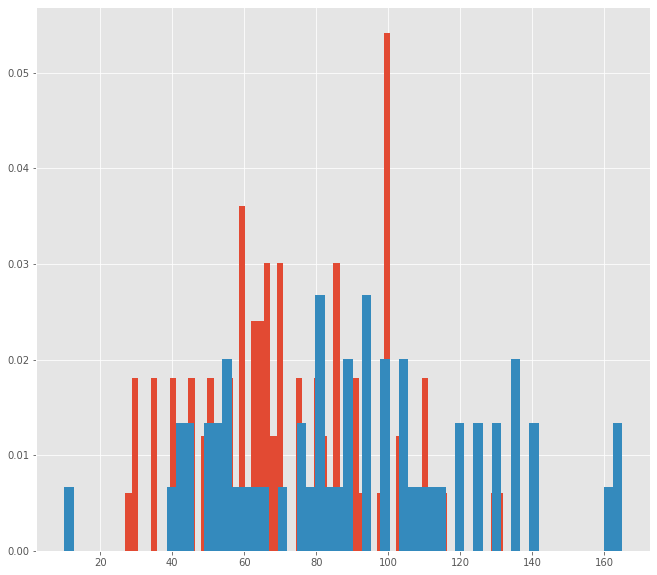

In [67]:
plt.hist(grass_list,  bins=60, density=True);
plt.hist(rock_list,  bins=60, density=True);

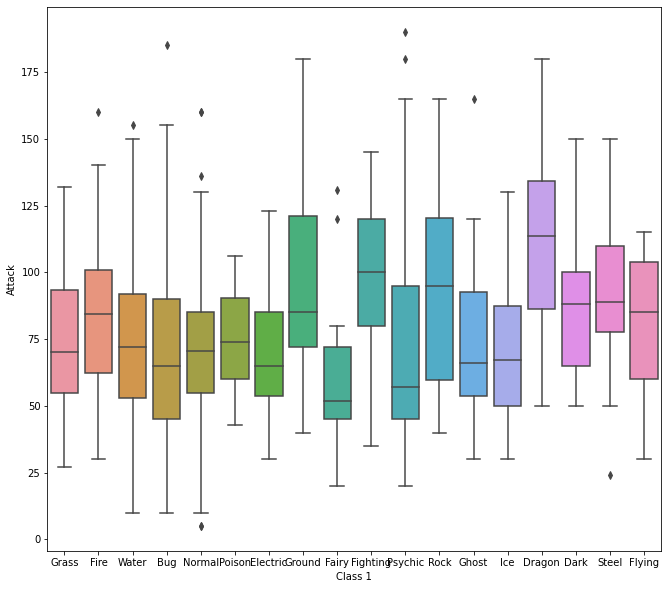

In [18]:
sns.boxplot(x='Class 1', y='Attack', data=df)

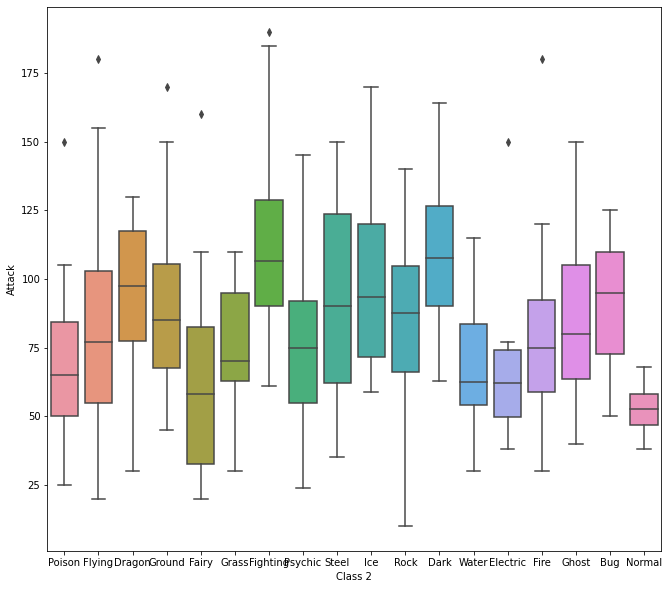

In [38]:
sns.boxplot(x='Class 2', y='Attack', data=df)

<div class="alert alert-info">
<b>Вопрос № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [19]:
# оставим только требуемые нам метрики
speed = df.loc[:, ['Class 1','Class 2','Speed']]
speed

,Class 1,Class 2,Speed
0,Grass,Poison,45
1,Grass,Poison,60
2,Grass,Poison,80
3,Grass,Poison,80
4,Fire,NaN,65
...,...,...,...
795,Rock,Fairy,50
796,Rock,Fairy,110
797,Psychic,Ghost,70
798,Psychic,Dark,80


In [20]:
# проверим, есть ли покемоны, относящиеся к обоим классам
drop = speed[((speed['Class 1'] == 'Water') & (speed['Class 2'] == 'Normal')) | ((speed['Class 1'] == 'Normal') & (speed['Class 2'] == 'Water'))]
drop.head()

,Class 1,Class 2,Speed
445,Normal,Water,71


In [21]:
# удалим покемонов, относящихся к ондому классу
speed.drop([445], axis = 0, inplace = True)
speed

,Class 1,Class 2,Speed
0,Grass,Poison,45
1,Grass,Poison,60
2,Grass,Poison,80
3,Grass,Poison,80
4,Fire,NaN,65
...,...,...,...
795,Rock,Fairy,50
796,Rock,Fairy,110
797,Psychic,Ghost,70
798,Psychic,Dark,80


In [22]:
# оставим только требуемые нам классы
speed = speed[((speed['Class 1'] == 'Water') | (speed['Class 1'] == 'Normal')) | ((speed['Class 2'] == 'Water') | (speed['Class 2'] == 'Normal'))]
speed

,Class 1,Class 2,Speed
9,Water,NaN,43
10,Water,NaN,58
11,Water,NaN,78
12,Water,NaN,78
20,Normal,Flying,56
...,...,...,...
762,Water,NaN,44
763,Water,NaN,59
764,Electric,Normal,70
765,Electric,Normal,109


In [23]:
# разобьем на выборки, которые будем сравнивать
water = speed[(speed['Class 1'] == 'Water') | (speed['Class 2'] == 'Water')]
water

,Class 1,Class 2,Speed
9,Water,NaN,43
10,Water,NaN,58
11,Water,NaN,78
12,Water,NaN,78
59,Water,NaN,55
...,...,...,...
759,Rock,Water,68
760,Poison,Water,30
762,Water,NaN,44
763,Water,NaN,59


In [24]:
water = water.loc[:, ['Speed']]
water

,Speed
9,43
10,58
11,78
12,78
59,55
...,...
759,68
760,30
762,44
763,59


In [25]:
normal = speed[(speed['Class 1'] == 'Normal') | (speed['Class 2'] == 'Normal')]
normal

,Class 1,Class 2,Speed
20,Normal,Flying,56
21,Normal,Flying,71
22,Normal,Flying,101
23,Normal,Flying,121
24,Normal,NaN,72
...,...,...,...
735,Fire,Normal,72
736,Fire,Normal,106
744,Normal,NaN,102
764,Electric,Normal,70


In [26]:
normal = normal.loc[:,['Speed']]
normal

,Speed
20,56
21,71
22,101
23,121
24,72
...,...
735,72
736,106
744,102
764,70


Н0 -  выборки имеют равные средние

In [27]:
stat, p = st.ttest_ind(water, normal)

print('Статистика =', stat, 'p =', p)
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = [-2.15091333] p = [0.03255354]
Отклоняем нулевую гипотезу, средние, вероятно, различаются


p_value = 0.032, следовательно различия выборок заметны, скорее всего эффект не случайный и статистически значимый

In [28]:
# проверим средние
print('Скорость water = ', water.mean(),'скорость normal =', normal.mean())

Скорость water =  Speed    64.936
dtype: float64 скорость normal = Speed    72.257426
dtype: float64


Вывод: предположение, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal` не подтверждается. Наоборот. Скорость water - 64.9, а скорость normal - 72.2

In [29]:
# визуализируем
# для этого сначала сформируем списки
water_list = list(df.loc[(df['Class 1'] == 'Water') | (df['Class 2'] == 'Water')]['Speed'])
normal_list = list(df.loc[(df['Class 1'] == 'Normal') | (df['Class 2'] == 'Normal')]['Speed'])

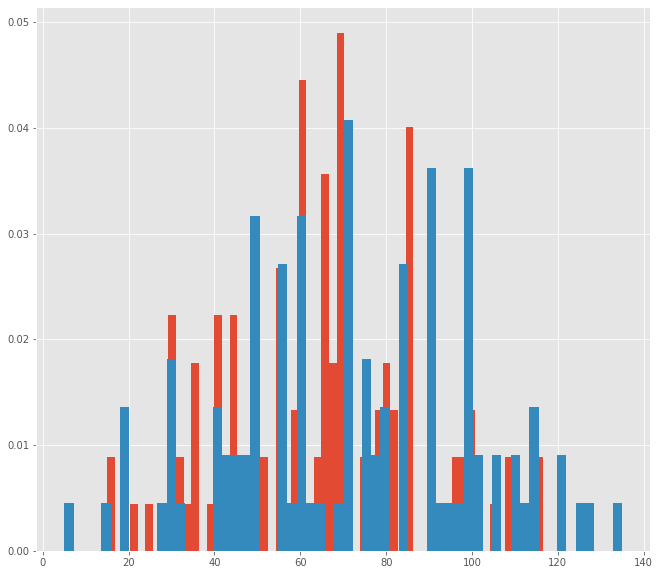

In [68]:
plt.hist(water_list,  bins=60, density=True);
plt.hist(normal_list,  bins=60, density=True);

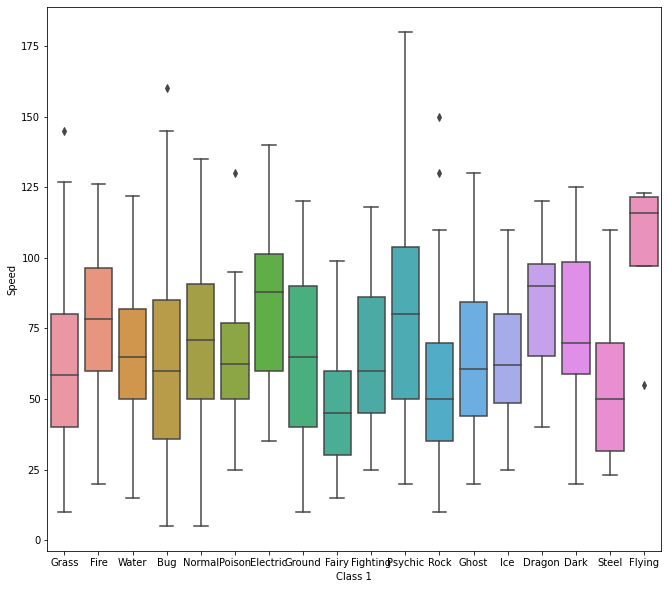

In [39]:
sns.boxplot(x='Class 1', y='Speed', data=df)

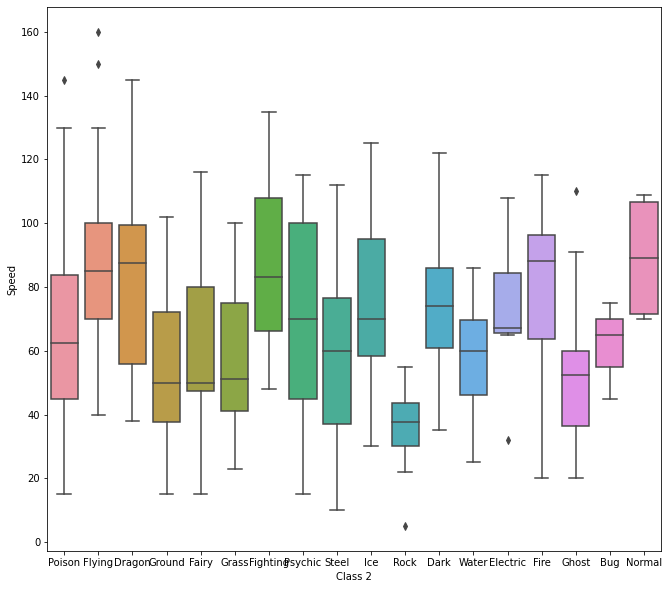

In [35]:
sns.boxplot(x='Class 2', y='Speed', data=df)

<div class="alert alert-info">
<b>Вопрос № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [40]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']
                  

In [41]:
treathed_pokemon

['Mega Beedrill', 'Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [42]:
treathed_pokemon = df[(df['Name'] == 'Mega Beedrill') | (df['Name'] == 'Mega Alakazam') |
                          (df['Name'] == 'Deoxys Normal Forme') | (df['Name'] == 'Mega Lopunny')]
treathed_pokemon

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [43]:
treathed = treathed_pokemon.loc[:, ['Speed']]
treathed

,Speed
19,145
71,150
428,150
476,135


In [44]:
no_threated_pokemon = df[~((df['Name'] == 'Mega Beedrill') | (df['Name'] == 'Mega Alakazam') |
                          (df['Name'] == 'Deoxys Normal Forme') | (df['Name'] == 'Mega Lopunny'))]
no_threated_pokemon 

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [45]:
no_threated = no_threated_pokemon.loc[:, ['Speed']]
no_threated

,Speed
0,45
1,60
2,80
3,80
4,65
...,...
795,50
796,110
797,70
798,80


Применяем Bootstrap для того, чтобы увеличить количество данных

In [46]:
boot_1d = []
for i in range(800):
    boot_mean = treathed.sample(frac=1, replace=True).mean()  
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

In [47]:
boot_1d

,Speed
0,148.75
1,141.25
2,147.50
3,146.25
4,142.50
...,...
795,150.00
796,146.25
797,142.50
798,145.00


H0 - средние выборок не отличаются, вакцина не эффективна

In [48]:
stat, p = st.ttest_ind(boot_1d, no_threated)
print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=75.645, p=0.00000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


p_value - стремится к нулю, следовательно различия выборок значительны, эффект не случайный и статистически значимый

In [49]:
boot_1d.mean()

Speed    144.854688
dtype: float64

In [50]:
no_threated.mean()

Speed    67.89196
dtype: float64

Вывод: средние выборок значительно отличаются, скорость невакцинированных - 67.8, вакцинированных - 144.9. Вакцина эффективна

<div class="alert alert-info">
<b>Вопрос № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
df.head()

In [51]:
#  дополним датафрейм суммой и произведением HP,Attack,Defense  
df['summa'] = df['HP'] + df['Attack'] + df['Defense'] 
df['multi'] = df['HP'] * df['Attack'] * df['Defense'] 
df

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,summa,multi
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000


In [52]:
# заменим true и false на 'да' и 'нет' с помощью функции
def change(row):
  if row['Legendary'] == True:
    return 'да'
  if row['Legendary'] == False:
    return 'нет'


In [53]:
df['leg'] = df.apply(change, axis = 1)
df

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,summa,multi,leg
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045,нет
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360,нет
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480,нет
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000,нет
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204,нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000,да
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000,да
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000,да
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000,да


In [54]:
# оставим только требуемые нам метрики
pok_sum = df.loc[:, ['leg', 'summa']]
pok_sum

,leg,summa
0,нет,143
1,нет,185
2,нет,245
3,нет,303
4,нет,134
...,...,...
795,да,300
796,да,320
797,да,250
798,да,300


In [55]:
# разобьем на выборки, которые будем сравнивать
leg_sum = pok_sum[pok_sum['leg'] == 'да']
leg_sum

,leg,summa
156,да,275
157,да,265
158,да,280
162,да,306
163,да,396
...,...,...
795,да,300
796,да,320
797,да,250
798,да,300


In [56]:
# оставим только сумму
leg_sum =leg_sum.loc[:, ['summa']]
leg_sum

,summa
156,275
157,265
158,280
162,306
163,396
...,...
795,300
796,320
797,250
798,300


In [57]:
no_leg_sum = pok_sum[pok_sum['leg'] == 'нет']
no_leg_sum

,leg,summa
0,нет,143
1,нет,185
2,нет,245
3,нет,303
4,нет,134
...,...,...
787,нет,307
788,нет,209
789,нет,396
790,нет,105


In [58]:
no_leg_sum = no_leg_sum.loc[:, ['summa']]
no_leg_sum

,summa
0,143
1,185
2,245
3,303
4,134
...,...
787,307
788,209
789,396
790,105


Н0 - выборки не отличаются, и легендарные покемоны не лучше обычных

In [59]:
stat, p = st.ttest_ind(leg_sum, no_leg_sum)
print('Статистика=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=11.592, p=0.000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


p_value - стремится к нулю, следовательно различия выборок значительны, эффект не случайный и статистически значимый

In [60]:
leg_sum.mean()

summa    309.076923
dtype: float64

In [61]:
no_leg_sum.mean()

summa    214.410884
dtype: float64

Вывод: сумма характеристик HP,Attack,Defense у легендарных покемонов выше(309), чем у других покемонов(214)

In [62]:
# визуализируем
# для этого сначала сформируем списки
leg_sum_list = list(df.loc[(df['leg'] == 'да')]['summa'])
no_leg_sum_list = list(df.loc[(df['leg'] == 'нет')]['summa'])

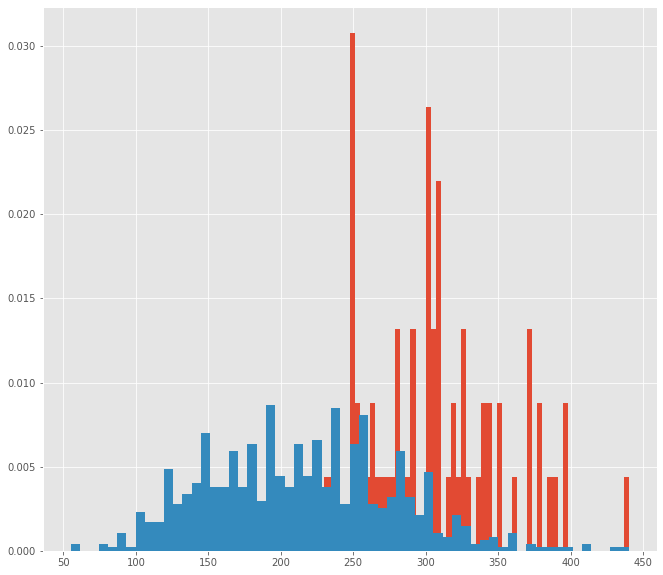

In [69]:
plt.hist(leg_sum_list, bins = 60, density = True);
plt.hist(no_leg_sum_list,  bins = 60, density = True);

Теперь проверим произведение

In [70]:
# оставим только требуемые нам метрики
pok_mul = df.loc[:, ['leg', 'multi']]
pok_mul 

,leg,multi
0,нет,108045
1,нет,234360
2,нет,544480
3,нет,984000
4,нет,87204
...,...,...
795,да,750000
796,да,880000
797,да,528000
798,да,768000


In [71]:
# разобьем на выборки, которые будем сравнивать
leg_mul = pok_mul[pok_mul['leg'] == 'да']
leg_mul

,leg,multi
156,да,765000
157,да,688500
158,да,810000
162,да,1049400
163,да,2014000
...,...,...
795,да,750000
796,да,880000
797,да,528000
798,да,768000


In [72]:
# оставим только произведение
leg_mul = leg_mul.loc[:, ['multi']]
leg_mul

,multi
156,765000
157,688500
158,810000
162,1049400
163,2014000
...,...
795,750000
796,880000
797,528000
798,768000


In [73]:
no_leg_mul = pok_mul[pok_mul['leg'] == 'нет']
no_leg_mul

,leg,multi
0,нет,108045
1,нет,234360
2,нет,544480
3,нет,984000
4,нет,87204
...,...,...
787,нет,1037000
788,нет,322575
789,нет,2045160
790,нет,42000


In [74]:
no_leg_mul = no_leg_mul.loc[:, ['multi']]
no_leg_mul

,multi
0,108045
1,234360
2,544480
3,984000
4,87204
...,...
787,1037000
788,322575
789,2045160
790,42000


Н0 - выборки не отличаются, и легендарные покемоны не лучше обычных

In [75]:
stat, p = st.ttest_ind(leg_mul, no_leg_mul)
print('Статистика=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=13.263, p=0.000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


p_value - стремится к нулю, следовательно различия выборок значительны, эффект не случайный и статистически значимый

In [76]:
round(leg_mul.mean(), 3)

multi    1085941.615
dtype: float64

In [77]:
no_leg_mul.mean()

multi    425041.389116
dtype: float64

Вывод: произведение характеристик HP,Attack,Defense у легендарных покемонов выше(1085941.615), чем у других покемонов(425041.389)

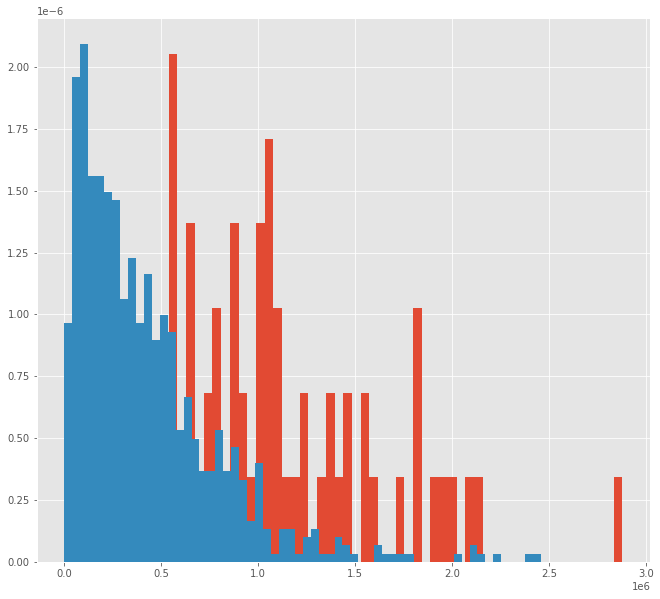

In [78]:
# визуализируем
# для этого сначала сформируем списки
leg_mul_list = list(df.loc[(df['leg'] == 'да')]['multi'])
no_leg_mul_list = list(df.loc[(df['leg'] == 'нет')]['multi'])

plt.hist(leg_mul_list, bins = 60, density = True);
plt.hist(no_leg_mul_list, bins = 60, density = True);

<div class="alert alert-info">
<b>Вопрос № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [79]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [80]:
# разобьем на выборки
best_defence_class_rock = df[(df['Class 1'] == 'Rock') | (df['Class 2'] == 'Rock')]
best_defence_class_rock                            

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,summa,multi,leg
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False,220,320000,нет
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False,265,600875,нет
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False,330,1248000,нет
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False,240,252000,нет
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False,260,646000,нет
120,121,Rhydon,Ground,Rock,105,130,120,45,45,40,False,355,1638000,нет
149,150,Omanyte,Rock,Water,35,40,100,90,55,35,False,175,140000,нет
150,151,Omastar,Rock,Water,70,60,125,115,70,55,False,255,525000,нет
151,152,Kabuto,Rock,Water,30,80,90,55,45,55,False,200,216000,нет
152,153,Kabutops,Rock,Water,60,115,105,65,70,80,False,280,724500,нет


In [81]:
best_defence_class_rock = best_defence_class_rock.loc[:, ['Defense']]   
best_defence_class_rock                       

,Defense
80,100
81,115
82,130
103,160
119,95
120,120
149,100
150,125
151,90
152,105


In [82]:
best_defence_class_ground = df[(df['Class 1'] == 'Ground') | (df['Class 2'] == 'Ground')]
best_defence_class_ground   

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,summa,multi,leg
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,False,210,318750,нет
33,34,Sandslash,Ground,NaN,75,100,110,45,55,65,False,285,825000,нет
36,37,Nidoqueen,Poison,Ground,90,92,87,75,85,76,False,269,720360,нет
39,40,Nidoking,Poison,Ground,81,102,77,85,75,85,False,260,636174,нет
55,56,Diglett,Ground,NaN,10,55,25,35,45,95,False,90,13750,нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,685,Golurk,Ground,Ghost,89,124,80,55,80,55,False,293,882880,нет
708,709,Landorus Incarnate Forme,Ground,Flying,89,125,90,115,80,101,True,304,1001250,да
709,710,Landorus Therian Forme,Ground,Flying,89,145,90,105,80,91,True,324,1161450,да
728,729,Diggersby,Normal,Ground,85,56,77,50,77,78,False,218,366520,нет


In [83]:
best_defence_class_ground = best_defence_class_ground.loc[:, ['Defense']]  
best_defence_class_ground

,Defense
32,85
33,110
36,87
39,77
55,25
...,...
684,80
708,90
709,90
728,77


In [84]:
best_defence_class_steel = df[(df['Class 1'] == 'Steel') | (df['Class 2'] == 'Steel')]
best_defence_class_steel

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,summa,multi,leg
88,89,Magnemite,Electric,Steel,25,35,70,95,55,45,False,130,61250,нет
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,False,205,285000,нет
220,221,Forretress,Bug,Steel,75,90,140,60,60,40,False,305,945000,нет
223,224,Steelix,Steel,Ground,75,85,200,55,65,30,False,360,1275000,нет
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,False,430,2156250,нет
228,229,Scizor,Bug,Steel,70,130,100,55,80,65,False,300,910000,нет
229,230,Mega Scizor,Bug,Steel,70,150,140,65,100,75,False,360,1470000,нет
245,246,Skarmory,Steel,Flying,65,80,140,40,70,70,False,285,728000,нет
328,329,Mawile,Steel,Fairy,50,85,85,55,55,50,False,220,361250,нет
329,330,Mega Mawile,Steel,Fairy,50,105,125,55,95,50,False,280,656250,нет


In [85]:
best_defence_class_steel = best_defence_class_steel.loc[:, ['Defense']]  
best_defence_class_steel

,Defense
88,70
89,95
220,140
223,200
224,230
228,100
229,140
245,140
328,85
329,125


In [86]:
best_defence_class_ice = df[(df['Class 1'] == 'Ice') | (df['Class 2'] == 'Ice')]
best_defence_class_ice

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,summa,multi,leg
94,95,Dewgong,Water,Ice,90,70,80,70,95,70,False,240,504000,нет
98,99,Cloyster,Water,Ice,50,95,180,85,45,70,False,325,855000,нет
133,134,Jynx,Ice,Psychic,65,50,35,115,95,95,False,150,113750,нет
142,143,Lapras,Water,Ice,130,85,80,85,95,60,False,295,884000,нет
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275,765000,да
233,234,Sneasel,Dark,Ice,55,95,55,35,75,115,False,205,287375,нет
238,239,Swinub,Ice,Ground,50,50,40,30,30,50,False,140,100000,нет
239,240,Piloswine,Ice,Ground,100,100,80,60,60,50,False,280,800000,нет
243,244,Delibird,Ice,Flying,45,55,45,65,45,75,False,145,111375,нет
257,258,Smoochum,Ice,Psychic,45,30,15,85,65,65,False,90,20250,нет


In [87]:
best_defence_class_ice = best_defence_class_ice.loc[:, ['Defense']]  
best_defence_class_ice

,Defense
94,80
98,180
133,35
142,80
156,100
233,55
238,40
239,80
243,45
257,15


Н0 - средние выборок не отличаются, классы покемонов не отличаются друг от друга статистически значимо

In [91]:
fvalue, pvalue = st.f_oneway(best_defence_class_rock, best_defence_class_ground, best_defence_class_steel, best_defence_class_ice)

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=10.820, p=0.000001
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [92]:
best_defence_class_rock.mean()

Defense    107.086207
dtype: float64

In [93]:
best_defence_class_ground.mean()

Defense    87.701493
dtype: float64

In [94]:
best_defence_class_steel.mean()

Defense    116.612245
dtype: float64

In [95]:
best_defence_class_ice.mean()

Defense    76.657895
dtype: float64

Вывод: отклоняем нулевую гипотезу, классы различаются между собой, и отличия их статистически значимы.
Средняя защита класса rock - 107.08, ground -  87.7, steel - 116.61, ice -  76.65.

<div class="alert alert-info">
<b>Вопрос № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты от других клаасов покемонов статистически значимо? 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [96]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [97]:
best_defence_class = df[(df['Class 1'] == 'Rock') | (df['Class 1'] == 'Ground') 
                            | (df['Class 1'] == 'Steel') | (df['Class 1'] == 'Ice')]

best_defence_class

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,summa,multi,leg
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,False,210,318750,нет
33,34,Sandslash,Ground,NaN,75,100,110,45,55,65,False,285,825000,нет
55,56,Diglett,Ground,NaN,10,55,25,35,45,95,False,90,13750,нет
56,57,Dugtrio,Ground,NaN,35,80,50,50,70,120,False,165,140000,нет
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False,220,320000,нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,778,Klefki,Steel,Fairy,57,80,91,80,87,75,False,228,414960,нет
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,False,209,322575,нет
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,False,396,2045160,нет
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000,да


In [98]:
best = best_defence_class.loc[:, ['Defense']]
best

,Defense
32,85
33,110
55,25
56,50
80,100
...,...
777,91
788,85
789,184
795,150


In [99]:
no_best_defence_class = df[~((df['Class 1'] == 'Rock') | (df['Class 1'] == 'Ground') 
                            | (df['Class 1'] == 'Steel') | (df['Class 1'] == 'Ice'))]
no_best_defence_class

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,summa,multi,leg
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045,нет
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360,нет
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480,нет
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000,нет
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204,нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,794,Yveltal,Dark,Flying,126,131,95,131,98,99,True,352,1568070,да
794,795,Zygarde Half Forme,Dragon,Ground,108,100,121,81,95,95,True,329,1306800,да
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000,да
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000,да


In [100]:
no_best = no_best_defence_class.loc[:, ['Defense']]
no_best

,Defense
0,49
1,63
2,83
3,123
4,43
...,...
793,95
794,121
797,60
798,60


H0 - выборки не отличаются. Все классы защиты одинковы

In [101]:
stat, p = st.ttest_ind(best, no_best)
print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=9.478, p=0.00000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


p_value - стремится к нулю, следовательно различия выборок значительны, эффект не случайный и статистически значимый

In [102]:
best.mean()

Defense    96.661417
dtype: float64

In [103]:
no_best.mean()

Defense    69.536404
dtype: float64

Вывод: в среднем защита выбранных классов выше, чем защита остальных